# Thompson Sampling

확률적인 알고리즘

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

Step 1. 각 라운드(행)에서 광고(열)에 관련한 두 변수를 만든다.
>N<sub>i</sub><sup>1</sup>(n) : n번째 라운드의 i번째 광고가 1의 리워드를 얻은 횟수

>N<sub>i</sub><sup>0</sup>(n) : n번째 라운드의 i번째 광고가 0의 리워드를 얻은 횟수

Step 2. 광고 i에 대하여 다음 식을 통해 임의의 값 θ를 얻는다.

$$\theta_i(n) = β(N_i^1(n) + 1, N_i^0(n) + 1)$$

Step 3. 가장 큰 θ<sub>i</sub>(n)을 선택한다.

In [6]:
import random

N = 10000
d =10
ads_selected =[]
numbers_of_reward_1 = [0] * d
numbers_of_reward_0 = [0] * d
total_reward = 0
for n in range(N):
  ad = 0
  max_random = 0
  for i in range(d):
    # Step 2
    random_beta = random.betavariate(numbers_of_reward_1[i] + 1, numbers_of_reward_0[i] + 1)
    # Step 3
    if random_beta > max_random:
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_reward_1[ad] += 1
  elif reward == 0:
    numbers_of_reward_0[ad] += 1
  total_reward += reward


## Visualising the results - Histogram

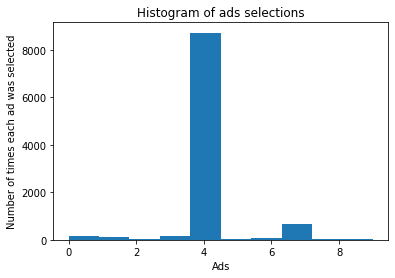

In [7]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()